# Classification

As always, we will start importing all of the libraries that we know we will need.
There is one new library here called seaborn. It is used for plotting and built on matplotlib. It has some really useful presets that we will be using.

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

We will be looking at a dataset about IRIS flowers today, found in **IRIS.csv**

In [142]:
df = pd.read_csv("./Downloads/IRIS.csv")

This dataset includes sepal length and width, along with petal length and width, and the particular species of iris. Here is a helpful digram:

![](https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png)

Let's look at our dataset:

In [143]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Notice that one of our columns, **species**, is catagorical. Since we know this may cause issues, let's go ahead and encode it to be numerical.

In [144]:
df['species_num'] = df['species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                        [0, 1, 2], inplace=False)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


There are a few easy ways we can get a look at how the columns in our dataset are related to each other. First, we can look at it's correlation matrix:

In [145]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species_num
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species_num,0.782561,-0.419446,0.949043,0.956464,1.000000


We can also plot what is called a **pairplot**:

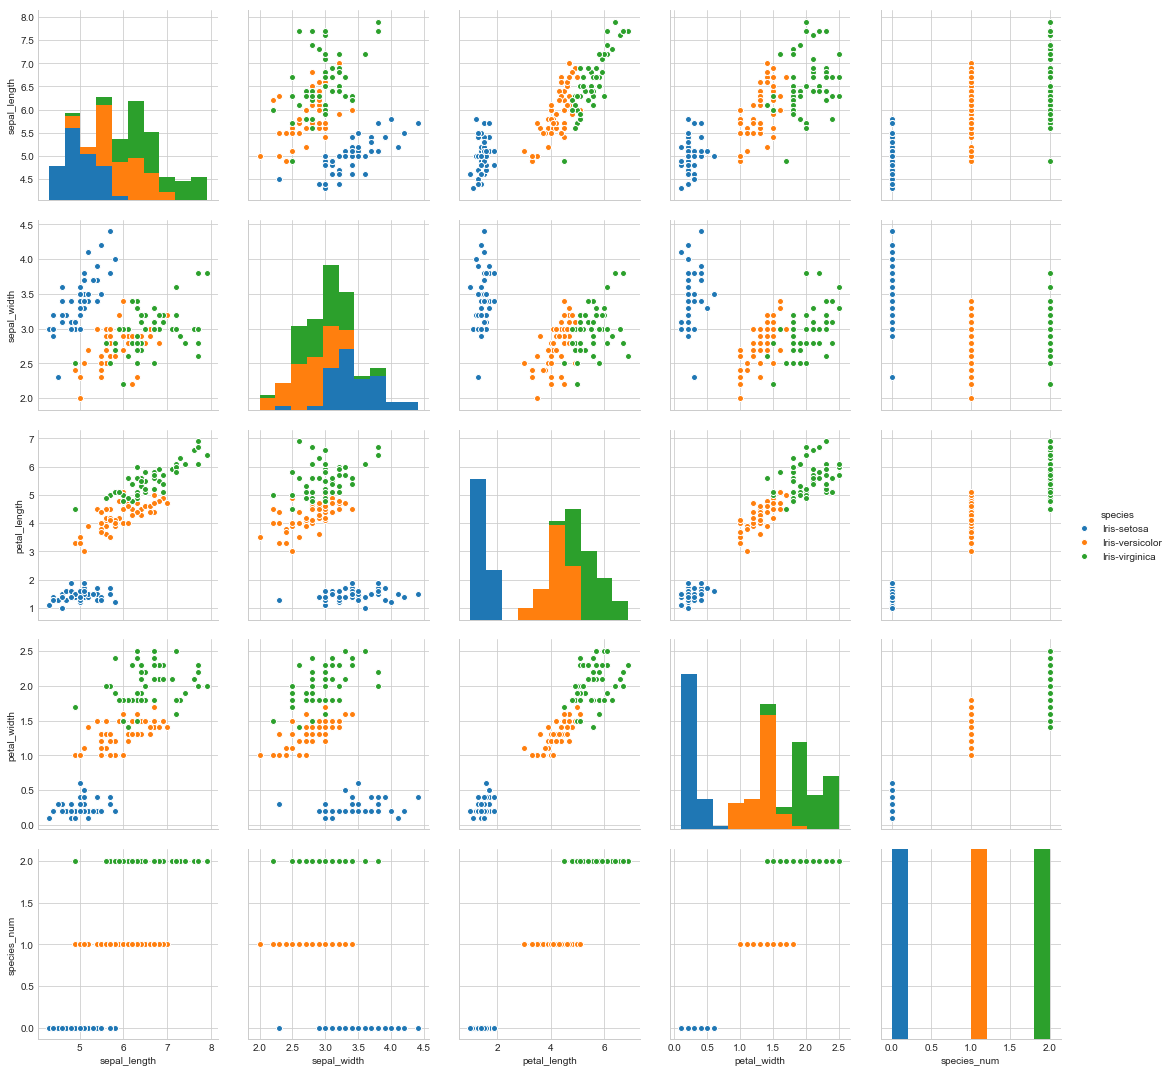

In [146]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="species",size=3)

## Training and Testing Sets

Let's split our data into training and testing sets using the **train_test_split** function from sklearn.

First we need to import it:

In [147]:
from sklearn.model_selection import train_test_split

Now we can use it to split up our data in an 80:20 ratio.

In [148]:
train, test=train_test_split(df,test_size=0.2,random_state=1010)

x = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = train['species'].values
y_num = train['species_num'].values

test_x = test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
test_y = test['species'].values
test_y_num = test['species_num'].values

print(test_y_num)


[1 1 0 2 0 1 2 0 1 2 0 1 0 2 1 1 2 1 2 0 2 2 2 0 0 0 0 0 0 0]


## Lasso Regression

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. 

First we need to import **Lasso** from sklearn

In [149]:
from sklearn.linear_model import Lasso

Now we can create and fit the model.

In [166]:
lasso = Lasso(alpha=0.1)
lasso.fit(x, y_num)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Then we can go ahead and predict the species type with our model for both the training and testing set.

In [167]:
lasso_train= lasso.predict(x)
lasso_test= lasso.predict(test_x)

We can print the lasso coefficients like this:

In [168]:
print(lasso.coef_)

[ 0.        -0.         0.4070964  0.       ]


Now let's make a pairity plot to visualize the predictions:

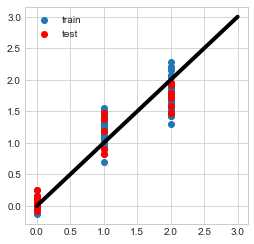

In [170]:
plt.figure(figsize=(4,4))

plt.scatter(y_num,lasso_train, label='train')
plt.scatter(test_y_num,lasso_test,color='r', label='test')
plt.plot([0,3],[0,3],lw=4,color='black')
plt.legend()

We can also make violin plots to give us a better idea of how many points we are seeing.

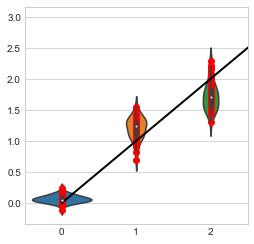

In [171]:
plt.figure(figsize=(4,4))
sns.violinplot(x=y_num,y=lasso_train,data=df, xlim=[0,3])
plt.scatter(y_num,lasso_train,color='r')
plt.plot([0,3],[0,3],lw=2,color='black')

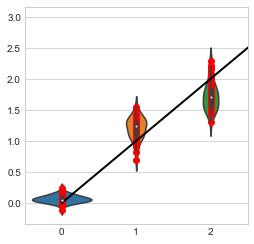

In [172]:
plt.figure(figsize=(4,4))
sns.violinplot(x=y_num,y=lasso_train,data=df, xlim=[0,3])
plt.scatter(y_num,lasso_train,color='r')
plt.plot([0,3],[0,3],lw=2,color='black')

Now let's look at the mean squared error and r-squared values.

In [177]:
#calculate the test and train error

print("Train error",mean_squared_error(y_num,lasso_train))
print("Train R-sq",r2_score(y_num,lasso_train))

print("\nTest error",mean_squared_error(test_y_num,lasso_test))
print("Test error",r2_score(test_y_num,lasso_test))

Train error 0.07093639711793415
Train R-sq 0.8906802099209918

Test error 0.06475344397784046
Test error 0.9095060565527074


Now, what happens when we adjust the alpha level in our model? How does this increase or decrease the accuracy?

# K Nearest Neighbors (KNN)

In [178]:
from sklearn.neighbors import KNeighborsRegressor

In [179]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x, y_num)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [182]:
knn_train=knn.predict(x)
knn_test=knn.predict(test_x)

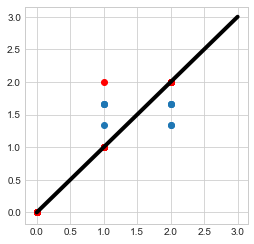

In [183]:
plt.figure(figsize=(4,4))

plt.scatter(y_num,knn_train)
plt.scatter(test_y_num,knn_test,color='r')
plt.plot([0,3],[0,3],lw=4,color='black')

In [90]:
#K-means
from sklearn.cluster import KMeans 

In [91]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

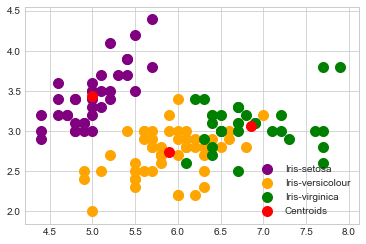

In [92]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

In [93]:
#Random Forrest

In [94]:
#Decision Tree
from sklearn import tree

In [102]:
dt = tree.DecisionTreeRegressor(max_depth=4)
dt.fit(x,y_num)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [103]:
train_pred=dt.predict(x)
test_pred=dt.predict(test_x)

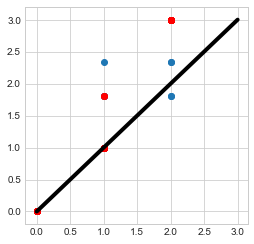

In [104]:
#parity plot 
plt.figure(figsize=(4,4))

plt.scatter(y_num,trainpred)
plt.scatter(test_y_num,testpred,color='r')
plt.plot([0,3],[0,3],lw=4,color='black')

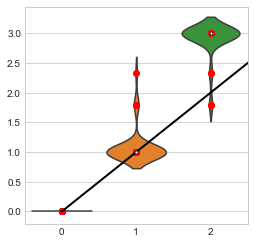

In [111]:
plt.figure(figsize=(4,4))
sns.violinplot(x=y_num,y=trainpred,data=df, xlim=[0,3])
plt.scatter(y_num,trainpred,color='r')
plt.plot([0,3],[0,3],lw=2,color='black')

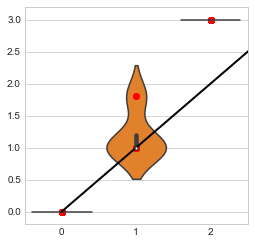

In [110]:
plt.figure(figsize=(4,4))
sns.violinplot(x=test_y_num,y=testpred,data=df)
plt.scatter(test_y_num,testpred,color='r')
plt.plot([0,3],[0,3],lw=2,color='black')

In [ ]:
#calculating error
from sklearn.metrics import mean_squared_error

In [107]:
#calculate the test and train error
train_pred=dt.predict(x)
test_pred=dt.predict(test_x)

print("Train error",mean_squared_error(y_num,train_pred))
print("Test error",mean_squared_error(test_y_num,test_pred))

Train error 0.015555555555555553
Test error 0.010666666666666661
